## Imports

In [12]:
from src.model import BeliefModel
from src.utils import generate_piecewise_linear_irm, generate_linear_supply
import pylab as pl

## Model instantiation

In [13]:
# Model Parameters
investment_time = 1 / 12
std_beliefs = 0.03
mean_beliefs = 0.07
traders_initial_budget = 1.0
std_crypto_returns = 0.5
gamma = 0.5
hc = 0.30
hs = 0.30
irm_crypto = generate_piecewise_linear_irm(0.85, 2.35 / 100, 10.35 / 100)
irm_stablecoin = generate_piecewise_linear_irm(0.90, 5 / 100, 15 / 100)
rho_c = 0.95
rho_s = 0.95
exogenous_supply_crypto = generate_linear_supply(0.5, 20)
exogenous_supply_stablecoin = generate_linear_supply(0.5, 20)
size_pop_traders = 250

# Model instanciation
model = BeliefModel(
    investment_time=investment_time,
    std_beliefs=std_beliefs,
    mean_beliefs=mean_beliefs,
    traders_initial_budget=traders_initial_budget,
    std_crypto_returns=std_crypto_returns,
    gamma=gamma,
    hc=hc,
    hs=hs,
    irm_crypto=irm_crypto,
    irm_stablecoin=irm_stablecoin,
    rho_c=rho_c,
    rho_s=rho_s,
    exogenous_supply_crypto=exogenous_supply_crypto,
    exogenous_supply_stablecoin=exogenous_supply_stablecoin,
    size_pop_traders=size_pop_traders,
)

## Compute Optimal Portfolio weight

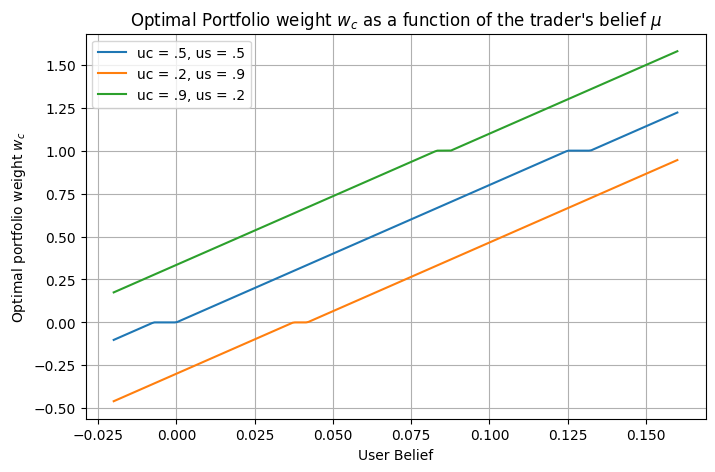

In [14]:
model.solve_traders_problem(uc=0.5, us=0.5)
x1 = [x.mu for x in model.traders_population]
y1 = [x.wc for x in model.traders_population]

model.solve_traders_problem(uc=0.2, us=0.9)
y2 = [x.wc for x in model.traders_population]

model.solve_traders_problem(uc=0.9, us=0.2)
y3 = [x.wc for x in model.traders_population]

fig, ax = pl.subplots(figsize=(8, 5))
ax.plot(x1, y1, label="uc = .5, us = .5")
ax.plot(x1, y2, label="uc = .2, us = .9")
ax.plot(x1, y3, label="uc = .9, us = .2")
ax.set_xlabel("User Belief")
ax.set_ylabel("Optimal portfolio weight $w_c$")
ax.set_title(
    "Optimal Portfolio weight $w_c$ as a function of the trader's belief $\\mu$"
)
ax.legend()
ax.grid()

## Find equilibrium

In [15]:
uc_eq, us_eq = model.compute_equilibrium_utilization_ratios()
print("uc* = ", uc_eq, "us* = ", us_eq)

uc* =  7.474147191170735e-05 us* =  0.20953424686453345


In [16]:
uc_market, us_market = model.compute_market_utilization_ratios(
    uc_eq, us_eq
)  # Check that we have a fixed point indeed.
print("uc_market = ", uc_market, "us_market = ", us_market)

uc_market =  7.474146275728386e-05 us_market =  0.2095342468783369
